In [15]:
import json
import pandas as pd
import time
from datetime import datetime

## Load raw data

In [16]:
# read file
with open('./data/fetched_stories.json', 'r') as f:
    stories = json.load(f)

In [17]:
stories[list(stories.keys())[-1:][0]]

{'by': 'floppydiskette',
 'descendants': 0,
 'id': 21692450,
 'score': 4,
 'time': 1575383073,
 'title': 'CSS: An Art, a Science, a Nightmare',
 'type': 'story',
 'url': 'https://www.taniarascia.com/overview-of-css-concepts/'}

## Prepare data

In [18]:
# create DataFrame from raw JSON
stories_df = pd.DataFrame(stories.values())

In [19]:
# sort data by ID
stories_df.sort_values(by="id", inplace=True)

In [20]:
# check order
stories_df.id.is_monotonic, stories_df.time.is_monotonic

(True, True)

In [21]:
stories_df.tail()

,by,descendants,id,score,time,title,type,url,kids,text
79538,chrjs,0,21692420,2,1575382877,Show HN: Squote – Semantic Quote Search,story,https://squote.xyz/,[21692436],NaN
79539,TakakiTohno,0,21692430,1,1575382970,Synthetic Voices Are Changing the Gaming Industry,story,https://www.keengamer.com/keengamer-blogs/tech...,NaN,NaN
79540,algorithm314,0,21692447,1,1575383048,Think Silicon demonstrates RISC-V ISA Based 3D...,story,https://think-silicon.com/2019/12/02/think-sil...,NaN,NaN
79541,cj,0,21692449,3,1575383072,I almost sold Baremetrics for $5m,story,https://baremetrics.com/blog/i-almost-sold-bar...,NaN,NaN
79542,floppydiskette,0,21692450,4,1575383073,"CSS: An Art, a Science, a Nightmare",story,https://www.taniarascia.com/overview-of-css-co...,NaN,NaN


## Make timeseries data set

In [22]:
data = stories_df[['score', 'id']].copy(deep=True)

In [23]:
times = pd.to_datetime(stories_df.time, unit='s')

In [24]:
data.index = times
data.index[0]

Timestamp('2019-08-29 19:02:49')

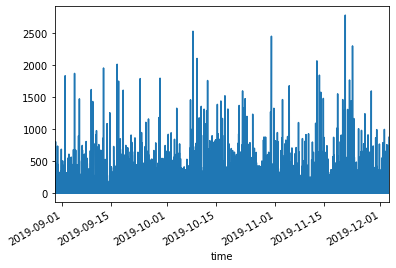

In [25]:
data['score'].plot()

In [26]:
len(data)

79543

In [27]:
# data['2019-08-31':'2019-08-31']
data

,score,id
time,,
2019-08-29 19:02:49,3,20832555
2019-08-29 19:05:04,464,20832570
2019-08-29 19:05:55,1,20832573
2019-08-29 19:06:10,1,20832577
2019-08-29 19:08:49,3,20832593
...,...,...
2019-12-03 14:21:17,2,21692420
2019-12-03 14:22:50,1,21692430
2019-12-03 14:24:08,1,21692447


### Collect duplicates

In [28]:
duplicates = stories_df[stories_df.duplicated('time', keep=False)==True][['score', 'id', 'time']]
duplicates.index = pd.to_datetime(duplicates.time, unit='s')
# duplicates.drop(columns='time', inplace=True)
del duplicates.index.name

In [29]:
duplicates

,score,id,time
2019-08-30 12:39:13,45,20837923,1567168753
2019-08-30 12:39:13,2,20837924,1567168753
2019-08-30 17:51:05,2,20840834,1567187465
2019-08-30 17:51:05,2,20840835,1567187465
2019-08-30 18:52:58,53,20841455,1567191178
...,...,...,...
2019-12-02 21:49:42,3,21687387,1575323382
2019-12-03 10:47:21,1,21691353,1575370041
2019-12-03 10:47:21,1,21691354,1575370041
2019-12-03 14:04:56,2,21692296,1575381896


In [30]:
g = duplicates.groupby(by=['time'], as_index=False)

In [31]:
g.count()

,time,score,id
0,1567168753,2,2
1,1567187465,2,2
2,1567191178,2,2
3,1567298991,2,2
4,1567346871,2,2
...,...,...,...
469,1575316857,2,2
470,1575318465,2,2
471,1575323382,2,2
472,1575370041,2,2


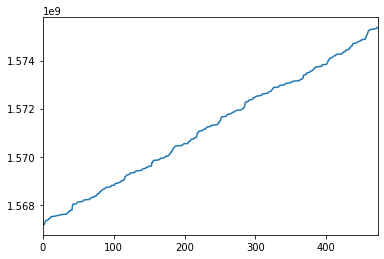

In [39]:
g.count().time.plot()
# сгруппировать по времени дня

In [33]:
datetime.fromtimestamp(1567522889)

datetime.datetime(2019, 9, 3, 18, 1, 29)

In [34]:
stories_df[stories_df['score']>3]

,by,descendants,id,score,time,title,type,url,kids,text
1,mikl,509,20832570,464,1567105504,Software made me loathe my car,story,https://mikkel.hoegh.org/2019/08/29/how-softwa...,"[20833055, 20833161, 20833425, 20833181, 20835...",NaN
13,protomyth,3,20832688,73,1567106341,Microwatt: A Tiny Open Power ISA Softcore Writ...,story,https://github.com/antonblanchard/microwatt,"[20852178, 20855559, 20855339]",NaN
16,headalgorithm,0,20832702,4,1567106434,Ways for Engineers to Leverage Their Social Me...,story,https://spectrum.ieee.org/at-work/tech-careers...,NaN,NaN
17,sooham,5,20832705,76,1567106467,"“That is either genius, or a seriously disease...",story,https://lkml.org/lkml/2018/3/20/845,"[20836936, 20838793, 20842116, 20851350, 20837...",NaN
20,headalgorithm,0,20832730,4,1567106634,How Amazon and Silicon Valley Seduced the Pent...,story,https://www.propublica.org/article/how-amazon-...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
79521,AdmiralAsshat,58,21692341,143,1575382248,Firefox 71,story,https://www.mozilla.org/en-US/firefox/71.0/rel...,"[21692520, 21692578, 21692585, 21692674, 21692...",NaN
79523,SolaceQuantum,125,21692353,246,1575382377,FDA bowed to industry for decades as alarms we...,story,https://www.reuters.com/investigates/special-r...,"[21692607, 21697933, 21694210, 21697997, 21693...",NaN
79532,pcr910303,83,21692400,104,1575382769,"Simple Dynamic Strings library for C, compatib...",story,https://github.com/antirez/sds,"[21694164, 21692949, 21697842, 21704671, 21695...",NaN
79537,se7entime,127,21692418,245,1575382853,Big Pile of Vim-Like,story,https://vim.reversed.top/,"[21692754, 21692690, 21692794, 21694624, 21695...",NaN
